# **Week 12: Categorical Data Analysis via Chi-squared Tests**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we will explore how to perform chi-squared tests in R to check for associations between categorical variables and to assess goodness of fit.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [22]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

**Do not modify the following**

In [23]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Test passed 😸


## **Chi-squared Tests in R**




R provides the `chisq.test()` function for performing **chi-squared tests**.  
It can be used for two main purposes:
- **Goodness-of-fit tests** – to check whether observed frequencies match expected probabilities.  
- **Tests of independence** – to determine whether two categorical variables are associated.


**Basic usage:**
```r
chisq.test(x,
           y = NULL,
           p = NULL,
           rescale.p = FALSE)


**Arguments:**
- `x`: a numeric vector of observed counts (for goodness-of-fit) or a matrix/table of counts (for independence tests)
- `y`: an optional second vector of counts, used when testing the independence between two categorical variables
- `p`: a vector of expected probabilities for goodness-of-fit tests; must be the same length as x and sum to 1
- `rescale.p`: logical; if TRUE, rescales p to sum to 1 if it does not already


**Details:**
- For a **goodness-of-fit test**, `x` is a vector of observed frequencies, and `p` gives the expected proportions.  
- For a **test of independence**, `x` is a contingency table (e.g., created with `table()` for instance), and the test checks for association between row and column variables are independent.  
- The function returns an object of class `"htest"`, containing the test statistic, degrees of freedom, and p-value.


### **Chi-squared Tests of Independence**




#### **Definition**


The **chi-squared test of independence** is used to determine whether two categorical variables are associated (dependent) or independent.

The test works by comparing the **observed counts** in each cell of a contingency table with the **expected counts** that would occur if the variables were independent.  

For two categorical variables X and Y, the hypotheses are:


- **Null hypothesis (H₀):**  
$$
P(Y \mid X) = P(Y)
$$  
(The variables X and Y are independent)

- **Alternative hypothesis (H₁):**  
$$
P(Y \mid X) \neq P(Y)
$$  
(The variables X and Y are not independent)

For a contingency table with $r$ rows and $c$ columns computed from observed data, we compute the following $\chi^2$ test statistic:

$$
\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Where:  
- $O_{ij}$ = observed count in row $i$, column $j$  
- $E_{ij} = \frac{(\text{row sum}_i) \times (\text{column sum}_j)}{\text{total}}$ = expected count under independence


The degrees of freedom for the chi-squared test of independence are:

$$
\text{df} = (r - 1) \times (c - 1)
$$

Where $r$ is the number of rows and $c$ is the number of columns in the contingency table.  


If the observed $\chi^2$ statistic is greater than $\chi^2_{\text{df}, 1-\alpha}$, we reject the null hypothesis at significance level $1-\alpha$.

#### **`Titanic` Example**

To demonstrate the chi-squared for tests of independence, we return to the `Titanic` example in Week 3, which is derived from the well-known `Titanic` dataset, containing information on 2,201 passengers aboard the Titanic, including their:

- Passenger class (`class`)
- Sex (`sex`)
- Age group (`age_status`, i.e., adult or child)
- Survival status (`survived`)

In [24]:
titanic = read.csv("./datasets/titanic.csv", stringsAsFactors = T)
titanic %>%
  str()

titanic %>%
  head(5)

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


,Class,Sex,Age,Survived
,<fct>,<fct>,<fct>,<fct>
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No


We are interested in testing whether or not there is an association between passenger class and survival. This test can be formalised as follows:

- **Null hypothesis (H₀):**
$$
P(\text{Survival} \mid \text{Class}) = P(\text{Survival})
$$
(Survival is independent of passenger class)

- **Alternative hypothesis (H₁):**
$$
P(\text{Survival} \mid \text{Class}) \neq P(\text{Survival})
$$
(Survival depends on passenger class)

In Week 3, we created unnormalised and normalised contingency tables for `Class` and `Survived`.

In [25]:
unnormalised_table = table(titanic$Class, titanic$Survived)
print(unnormalised_table)
normalised_table = prop.table(unnormalised_table, margin = 1)*100 #Normalised by row (i.e., within each class)
print(normalised_table)

      
        No Yes
  1st  122 203
  2nd  167 118
  3rd  528 178
  Crew 673 212
      
             No      Yes
  1st  37.53846 62.46154
  2nd  58.59649 41.40351
  3rd  74.78754 25.21246
  Crew 76.04520 23.95480


Informally, we can see that the survival rate increases as you go from Crew members to 1st class. This aligns with historical accounts, as most crew members (especially those working in lower bunkers) had higher mortality, while passengers in 1st class, located on the upper decks, had easier access to lifeboats.

We can run a chi-squared test of independence to formally assess this.

In [26]:
chisq.test(unnormalised_table) %>% print()


	Pearson's Chi-squared test

data:  unnormalised_table
X-squared = 190.4, df = 3, p-value < 2.2e-16



Or equivalently,

In [27]:
chisq.test(titanic$Class, titanic$Survived) %>% print()


	Pearson's Chi-squared test

data:  titanic$Class and titanic$Survived
X-squared = 190.4, df = 3, p-value < 2.2e-16



Here, we don't need to create a contingency table as R will automatically do that.

From the output, the number of degrees of freedom is 3, which is:

$$\text{(#Categories in Class - 1)} \times \text{(#Categories in Survived - 1)} = (4-1)\times(2-1) = 3$$

The p-value is extremely small. We would reject the null hypothesis at any conventional significance levels. This suggests that there is an association between `Survived` and `Class`, as we expected.

### **Chi-squared Goodness-of-Fit Test**



#### **Definition**

The **chi-squared goodness-of-fit test** is used to determine whether the observed frequencies in one categorical variable match the expected frequencies under a specified theoretical distribution.

The test works by comparing the **observed counts** in each category with the **expected counts** calculated from the hypothesised probabilities.  

For a categorical variable with $k$ categories, the hypotheses are:

- **Null hypothesis (H₀):**  
$$
P(\text{Category } i) = p_i \quad \text{for all } i = 1, \dots, k
$$  
(The observed frequencies follow the expected distribution)

- **Alternative hypothesis (H₁):**  
$$
P(\text{Category } i) \neq p_i \quad \text{for at least one } i
$$  
(The observed frequencies do not follow the expected distribution)



The observed chi-squared statistic is calculated as:

$$
\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$

Where:  
- $O_i$ = observed count in category $i$
- $E_i = p_i \times n$ = expected count in category $i$ based on the hypothesised probabilities and total sample size $n$  


The degrees of freedom are:

$$
\text{df} = k - 1 - m
$$

Where $m$ is the number of parameters estimated from the data (usually 0 if the expected probabilities are fully specified).

If the observed $\chi^2$ statistic is greater than $\chi^2_{\text{df}, 1-\alpha}$, we reject the null hypothesis at significance level $1-\alpha$.

**Note that if data are continuous, this test can still be used; however, binning is required. Moreover, in this workshop, probabilities will be well-specified.**

#### **Benford's Law Example**


**Question:**  

Benford's Law states that in many naturally occurring datasets, smaller digits appear as the leading digit more frequently than larger digits, with the probability of the first digit $d$ given by:

$$
P(D = d) = \log_{10}\left(1 + \frac{1}{d}\right), \quad d = 1, 2, \dots, 9
$$

![Benford Law](https://upload.wikimedia.org/wikipedia/commons/8/82/Benford-physical.svg)


This has been utilised in various applications, e.g., fraud detection, where Benford's Law provides a **heuristic** to check for evidence of fraud in accounting or financial datasets.

As an example, we collect financial data from Jane's accounting records. We will evaluate whether there is any evidence of fraud by testing whether the data follow Benford's Law.


In [31]:
Jane = read.csv("./datasets/Jane.csv") %>% pull(x)
Jane %>% str()

 int [1:1000] 189 48 658 116 178 222 55 50 141 264 ...


We first need to extract first digits of numbers in `Jane`.

In [33]:
first_digits = as.numeric(substr(as.character(Jane), 1, 1))
first_digits %>% str()

 num [1:1000] 1 4 6 1 1 2 5 5 1 2 ...


A frequency table can be created to estimate the frequency of each leading digit in the dataset. We can also visualise these frequencies to see whether they closely match Benford's Law.

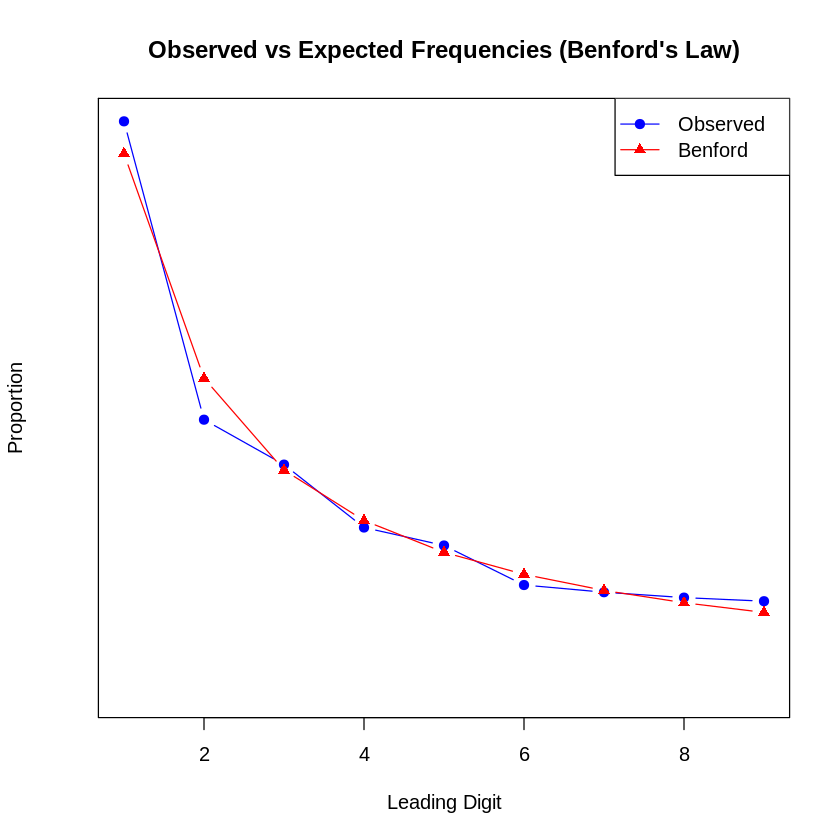

In [34]:
# Observed (relative) frequencies
obs_freq = table(first_digits)/length(first_digits)

# Benford's Law's Predictions
benford_freq = log10(1 + 1 / (1:9))

# Plot observed frequencies
plot(
  1:9, obs_freq,
  type = "b", pch = 19, col = "blue",
  xlab = "Leading Digit",
  ylab = "Proportion",
  ylim = c(0, max(c(obs_freq, benford_freq))),
  main = "Observed vs Expected Frequencies (Benford's Law)"
)

# Add Benford expected frequencies
lines(1:9, benford_freq, type = "b", pch = 17, col = "red")

# Add legend
legend(
  "topright",
  legend = c("Observed", "Benford"),
  col = c("blue", "red"),
  pch = c(19, 17),
  lty = 1
)


The observed frequencies appear to closely match Benford's Law. For a more formal assessment, we can perform a chi-squared test for goodness-of-fit.


- **Null hypothesis (H₀):** The distribution of the leading digits in the dataset follows Benford's Law.  
- **Alternative hypothesis (H₁):** The distribution of the leading digits in the dataset does **not** follow Benford's Law.


In [36]:
obs_counts = table(first_digits)
benford_freq = log10(1 + 1 / (1:9))

chisq.test(x = obs_counts, p = benford_freq)


	Chi-squared test for given probabilities

data:  obs_counts
X-squared = 6.073, df = 8, p-value = 0.6391


Here, the number of degrees of freedom is $8$, which is $9-1$. The p-value is 0.6391, quite larger than any conventional thresholds (e.g., 5%, 1%, or 10%). Therefore, there is no evidence to reject the hypothesis that the observed frequencies follow Benford's Law.

According to this analysis, Jane's book appears to be consistent with the expected distribution.

## **Workshop Questions**

### **Question 1**

Given the `titanic` dataset, use an appropriate method to test if there is any association between passenger class (`Class`) and sex (`Sex`).

<details>
<summary>▶️ Click to show the solution </summary>

We are interested in testing whether or not there is an association between **sex** and **survival**. Here, a chi-squared test of independence can be used, which is formalised as follows:

- **Null hypothesis (H₀):**  
$$
P(\text{Survival} \mid \text{Sex}) = P(\text{Survival})
$$
(Survival is independent of sex)

- **Alternative hypothesis (H₁):**  
$$
P(\text{Survival} \mid \text{Sex}) \neq P(\text{Survival})
$$
(Survival depends on sex)

```r
chisq.test(titanic$Survived, titanic$Sex)
```

The p-value is extremely smaller than any conventional thresholds (5%, 1%, or 10%). There is evidence against the null hypothesis that survival is independent of sex.

**FYI:**

> "Women and children first", known to a lesser extent as the Birkenhead drill, is an unofficial code of conduct and gender role whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited. However, it has no basis in maritime law."

> "Notable invocations of the concept include during the 1852 evacuation of the Royal Navy troopship HMS Birkenhead, the 1857 sinking of the ship SS Central America, and most famously during the 1912 sinking of the Titanic."

(From [Women and children first - Wikipedia](https://en.wikipedia.org/wiki/Women_and_children_first)


</details>

### **Question 2**

Use a chi-squared goodness-of-fit test to determine whether the distribution of hair colors in the `HairEyeColor` dataset differs from what would be expected under a discrete uniform distribution (e.g., all categories are equally likely).


In [42]:
HairColorFreq = margin.table(HairEyeColor, 1)
HairColorFreq

Hair
Black Brown   Red Blond 
  108   286    71   127 

<details>
<summary>▶️ Click to show the solution </summary>

We are interested in testing whether or not the observed **hair color** distribution differs from a uniform distribution. Here, a chi-squared goodness-of-fit test can be used, which is formalised as follows:

- **Null hypothesis (H₀):**  
$$
P(\text{Hair Color}) =  \frac{1}{4}  \text{   (as there are 4 colours in the dataset)}
$$
(The observed hair color frequencies follow a uniform distribution)

- **Alternative hypothesis (H₁):**  
$$
P(\text{Hair Color}) \neq \frac{1}{4}
$$
(The observed hair color frequencies do not follow a uniform distribution)



```r
chisq.test(x = HairColorFreq, p = rep(1/4, 4))
```

The p-value is extremely smaller than any conventional thresholds (5%, 1%, or 10%). There is evidence against the null hypothesis that the observed hair color frequencies follow a uniform distribution.


</details>